# Install Lib

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pickle
import random 
import joblib

sns.set_style("darkgrid")

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
%%capture
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline 

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

from collections import Counter


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.utils import resample

# from scikitplot.metrics import plot_roc
# from scikitplot.metrics import plot_precision_recall
# from scikitplot.metrics import plot_cumulative_gain
# from scikitplot.metrics import plot_lift_curve
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
!ls "/content/drive/My Drive/"

Mounted at /content/drive
 ALL.gdoc  'Colab Notebooks'   handson-ml2-master   Torrent
 BIDV	   'COMPUTER VISION'   KAGGLE
 BOOK	    FASTAI	      'Mo ta bang.gsheet'


# Check predict

In [ ]:
def process_data_type(df):
    #xy ly kieu du lieu la date
    df["DAY_OPEN"]=pd.to_datetime(df["DAY_OPEN"])
    df["DAY_CLOSE"]=pd.to_datetime(df["DAY_CLOSE"])
    df["DAY_START"] = pd.to_datetime(df["DAY_START"])
    df["DAY_SUBM"] = pd.to_datetime(df["DAY_SUBM"])

    df["DAY_OPEN_YEAR"]=df["DAY_OPEN"].dt.year
    df["DAY_OPEN_MONTH"] = df["DAY_OPEN"].dt.month
    df["DAY_OPEN_DAY"] = df["DAY_OPEN"].dt.day

    df["DAY_CLOSE_YEAR"] = df["DAY_CLOSE"].dt.year
    df["DAY_CLOSE_MONTH"] = df["DAY_CLOSE"].dt.month
    df["DAY_CLOSE_DAY"] = df["DAY_CLOSE"].dt.day

    df["DAY_START_YEAR"] = df["DAY_START"].dt.year
    df["DAY_START_MONTH"] = df["DAY_START"].dt.month
    df["DAY_START_DAY"] = df["DAY_START"].dt.day

    df["DAY_SUBM_YEAR"] = df["DAY_SUBM"].dt.year
    df["DAY_SUBM_MONTH"] = df["DAY_SUBM"].dt.month
    df["DAY_SUBM_DAY"] = df["DAY_SUBM"].dt.day



    df = df.drop("DAY_CLOSE",1)
    df = df.drop("DAY_OPEN",1)
    df = df.drop("DAY_START", 1)
    df = df.drop("DAY_SUBM", 1)

    return df

In [ ]:
loaded_model = joblib.load(r"/content/drive/MyDrive/BIDV/CARD_FRAUD/model/finalized_model_06_20210716-101219.sav")

In [ ]:
# test du lieu 01/7-12/07
#fraud_mids=pd.read_csv(r"/content/drive/MyDrive/BIDV/CARD_FRAUD/data/test_real_data/FRAUD_07.csv", error_bad_lines=False)
#fraud_data=pd.read_csv(r"/content/drive/MyDrive/BIDV/CARD_FRAUD/data/test_real_data/data_1207.csv", error_bad_lines=False)

# test du lieu 12/07-29/07
fraud_mids=pd.read_csv(r"/content/drive/MyDrive/BIDV/CARD_FRAUD/data/fraud_cf.csv", error_bad_lines=False)

features = pd.read_csv(r"/content/drive/MyDrive/BIDV/CARD_FRAUD/data/trainning/feature_model_06_20210716-101219.csv")
num_features = pd.read_csv(r"/content/drive/MyDrive/BIDV/CARD_FRAUD/data/trainning/num_feature_model_06_20210716-101219.csv")

In [ ]:
# fraud_data=pd.read_csv(r"/content/drive/MyDrive/BIDV/CARD_FRAUD/data_run/test_real_data/data_2807.csv", error_bad_lines=False)
fraud_data=pd.read_csv(r"/content/drive/MyDrive/BIDV/CARD_FRAUD/data_run/data_2021_11_07.csv", error_bad_lines=False)

index_fraud_mids = fraud_data['MERCHANT'].isin(fraud_mids['MID'])
index_fraud_mids.value_counts()
df_check = fraud_data[index_fraud_mids]
df_check['MERCH_FR'] = 1

# df_test = process_data_type(df_check)
df_test = process_data_type(fraud_data)
# y_test = df_test['MERCH_FR']
x_test = df_test[features.feature].copy()
results = loaded_model.predict(x_test)
sum(results)

False    58419
True       938
Name: MERCHANT, dtype: int64

2671

In [ ]:
fraud_data['MERCHANT_FR'] = results
predict_fraud = fraud_data[fraud_data['MERCHANT_FR']==1]
predict_fraud.shape

(2671, 400)

In [ ]:
index_fraud_mids = predict_fraud['MERCHANT'].isin(fraud_mids['MID'])
index_fraud_mids.value_counts()

False    1745
True      926
Name: MERCHANT, dtype: int64

In [ ]:
df_remove_old = predict_fraud[index_fraud_mids==False]
df_export = df_remove_old[(df_remove_old['DS_HNAY'] > 150000000) | (df_remove_old['GTGDTB_HNAY'] > 10000000)]

output = pd.DataFrame({'Merchant': df_export.MERCHANT, 
                       'SLGD_HNAY': df_export.SLGD_HNAY,
                       'DS_HNAY': df_export.DS_HNAY,
                       'GTGDTB_HNAY': df_export.GTGDTB_HNAY,
                       'FRAUD': df_export.MERCHANT_FR})
output.to_csv('/content/drive/MyDrive/BIDV/CARD_FRAUD/output_run/results_0711.csv', index=False)

In [ ]:
df_export.shape

(266, 400)

In [ ]:
fraud_data_rule = fraud_data[fraud_data['DS_HNAY'] > 150000000 and fraud_data['DS_HNAY'] > 150000000]

In [ ]:
df_remove_old.CST_TOT_CST_CR_AMT_TDY_LCY

2               0.0
117             0.0
163      83175000.0
185             0.0
274             0.0
            ...    
58707           0.0
58720    29000000.0
58758    50000000.0
58808           0.0
58842           0.0
Name: CST_TOT_CST_CR_AMT_TDY_LCY, Length: 2286, dtype: float64

In [ ]:
print(classification_report(y_test, results))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.94      0.97       216

    accuracy                           0.94       216
   macro avg       0.50      0.47      0.48       216
weighted avg       1.00      0.94      0.97       216



In [ ]:
x_test.head()

,MER_TYPE,BRANCH,CURR_NUM,DAY_REINSTATED,DAYS_AVGE,FL_LIM1,FL_LIM2,FL_LIM3,FL_LIM4,GROSS_SALE,HO_RATE,LAST_V_DAY,LAST_VOUCH,LST_COM_DY,LST_DEP_DY,LST_PAY_DY,MP_IND,PAY_METHOD,PAYMT_DAYS,PRV_DEP_DY,TERM_FEE,TRAN_AVGE,VOUCH_USED,WEEK_COUNT,WEEKLY_DAY,NUM_OF_TERM,AVG_LBY_BAL_AMT_2YR_AGO,AVG_LBY_BAL_AMT_3YR_AGO,AVG_LBY_BAL_AMT_LAST_YR,TOT_NET_INCM_2YR_AGO,TOT_NET_INCM_3YR_AGO,TOT_NET_INCM_LAST_YR,MRCH_FCT_NBR_OF_TXN_YTD,MRCH_FCT_TXN_CR_AMT_YTD_LCY,MRCH_FCT_TXN_DB_AMT_YTD_LCY,MRCH_FCT_AGRT_BAL_AMT_YTD_FCY,MRCH_FCT_NBR_OF_DYS_YTD,MRCH_FCT_NBR_OF_NEW_POS_YTD,MRCH_FCT_NBR_OF_CLS_POS_YTD,MRCH_FCT_NBR_OF_ACTV_POS,...,CST_TOT_LBY_ACR_PNY_INT_LTD_LCY,CST_AGRT_LBY_CLS_BAL_AMT_LYR_LCY,CST_NBR_OF_DAY_CIF,MSS_S,MSS_F,AVG_AMT,BIDV_ACCT_DEB,BIDV_ACCT_CRE,ISSUER_OTHER_TXN_NBR,HAS_TXN_LESS_15S,DAY_OPEN_YEAR,DAY_OPEN_MONTH,DAY_OPEN_DAY,DAY_CLOSE_YEAR,DAY_CLOSE_MONTH,DAY_CLOSE_DAY,DAY_START_YEAR,DAY_START_MONTH,DAY_START_DAY,DAY_SUBM_YEAR,DAY_SUBM_MONTH,DAY_SUBM_DAY,CLOSE_RSN,CHIP_YN,COMM_FREQ,ELEC_IND,HO_MMSFCD,LINK_TYPE,MERCH_GRP,REC_TYPE,IS_MERGE_CIF,CST_MKT_SEG,GND,CST_NATIONALITY,CST_TP,CST_DIMMAR_ST,INR_CR_RTG,CST_PERF_ST,IS_CST_FCT_MERG,LABEL_PREDICT
86,5411,126,704,0,1,150,150,0,5000,3.321940e+08,0.0,0,0,23549,23549,23561,0,1,12,23549,0.0,15818762.0,526,4,23567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,526,0.0,9.353809e+09,1.738526e+09,193,1,0,1,...,0.0,0.000000e+00,214,25578,2646,1.582909e+07,0,0,64,0,2021,3,4,2099,12,31,1970,1,1,1970,1,1,ACTIVE,1,D,1,,,,I,Y,UNKNOWN,UNKNOWN,UNKNOWN,RB,UNKNOWN,UNKNOWN,UNKNOWN,Y,1
366,5411,216,704,0,1,150,150,0,5000,5.489039e+08,0.0,0,0,23569,23569,23569,0,1,0,23569,0.0,12618481.0,654,4,23567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,650,0.0,9.945902e+09,1.582772e+08,193,1,0,1,...,0.0,0.000000e+00,118,69678,8379,1.452808e+07,0,3,174,0,2021,3,18,2099,12,31,1970,1,1,1970,1,1,ACTIVE,1,D,1,,,,I,Y,UNKNOWN,UNKNOWN,UNKNOWN,RB,UNKNOWN,UNKNOWN,UNKNOWN,Y,1
436,5411,129,704,0,1,300,300,0,5000,2.443778e+08,0.0,0,0,23569,23569,23569,0,1,0,23569,0.0,18798288.0,1471,4,23567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,582,0.0,1.119607e+10,9.009981e+08,193,0,0,1,...,0.0,1.276875e+10,474,31311,13671,2.235963e+07,0,0,102,0,2020,3,30,2099,12,31,1970,1,1,1970,1,1,ACTIVE,1,D,1,,,,I,Y,UNKNOWN,UNKNOWN,UNKNOWN,RB,UNKNOWN,UNKNOWN,UNKNOWN,Y,1
521,5411,124,704,0,1,150,150,0,5000,5.000000e+03,0.0,0,0,23534,23534,23546,0,1,12,23534,0.0,20000.0,184,4,23567,3.0,0.0,0.0,0.0,0.0,0.0,0.0,184,0.0,5.998368e+09,3.183371e+08,193,3,3,0,...,0.0,0.000000e+00,160,0,0,0.000000e+00,0,0,0,0,2021,2,5,2021,6,23,1970,1,1,1970,1,1,S,1,D,1,,,,I,Y,Phổ thông 1,Male,VIETNAM,RB,UNKNOWN,UNKNOWN,UNKNOWN,Y,1
1029,5411,126,704,0,1,5000,5000,0,5000,5.368574e+08,0.0,0,0,23569,23569,23569,0,1,0,23569,0.0,16392592.0,1472,4,23567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,830,0.0,1.145022e+10,3.956510e+08,193,0,0,1,...,0.0,2.461007e+08,318,65268,4851,1.544893e+07,0,0,159,0,2020,8,31,2099,12,31,1970,1,1,1970,1,1,ACTIVE,1,D,1,,,,I,Y,UNKNOWN,UNKNOWN,UNKNOWN,RB,UNKNOWN,UNKNOWN,UNKNOWN,Y,1


In [ ]:
x_test['LABEL_PREDICT'] = results

In [ ]:
x_test.to_csv(r'/content/drive/MyDrive/BIDV/CARD_FRAUD/data/test_real_data/result_1207.csv')

# Features Important

In [ ]:
loaded_model

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                           

In [ ]:
model = loaded_model['classifier']
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

In [ ]:
len(features.feature) # = 285
len(importances)  #= 268
len(num_features.num_feature) #= 268

285

268

268

<BarContainer object of 49 artists>

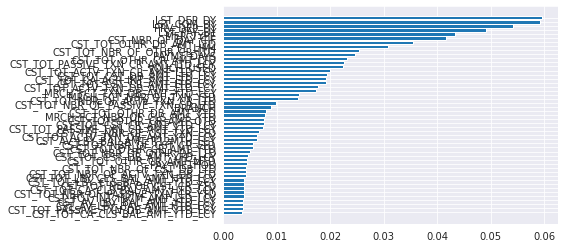

In [ ]:
sorted_idx = importances.argsort()
plt.barh(num_features.num_feature[sorted_idx[-50:-1]], importances[sorted_idx[-50:-1]])

Text(0.5, 1.0, 'Feature importances using MDI')

Text(0, 0.5, 'Mean decrease in impurity')

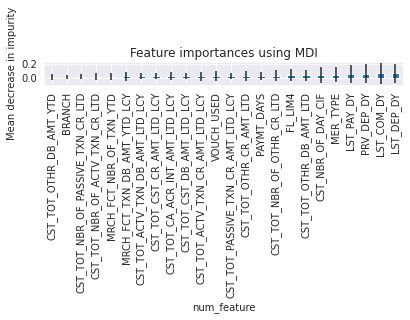

In [ ]:
forest_importances = pd.Series(importances[sorted_idx[-25:-1]], index=num_features.num_feature[sorted_idx[-25:-1]])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std[sorted_idx[-25:-1]], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
list_75_important_features = num_features.num_feature[sorted_idx[-75:-1]]
list_100_important_features = num_features.num_feature[sorted_idx[-100:-1]]
list_120_important_features = num_features.num_feature[sorted_idx[-120:-1]]
list_150_important_features = num_features.num_feature[sorted_idx[-150:-1]]

In [ ]:
list_75_important_features.to_csv(r'/content/drive/MyDrive/BIDV/CARD_FRAUD/model/75_imp_feature_model_06_20210716-101219.csv', index=False)
list_100_important_features.to_csv(r'/content/drive/MyDrive/BIDV/CARD_FRAUD/model/100_imp_feature_model_06_20210716-101219.csv', index=False)
list_120_important_features.to_csv(r'/content/drive/MyDrive/BIDV/CARD_FRAUD/model/120_imp_feature_model_06_20210716-101219.csv', index=False)
list_150_important_features.to_csv(r'/content/drive/MyDrive/BIDV/CARD_FRAUD/model/150_imp_feature_model_06_20210716-101219.csv', index=False)

In [ ]:
x = pd.read_csv(r'/content/drive/MyDrive/BIDV/CARD_FRAUD/model/50_imp_feature_model_06_20210716-101219.sav')
x.head()

,num_feature
0,CST_TOT_CA_CLS_BAL_AMT_YTD_LCY
1,CST_TOT_PASSIVE_TXN_DB_AMT_YTD_LCY
2,CST_AV_LBY_BAL_AMT_HTD_LCY
3,CST_AV_LBY_BAL_AMT_YTD_LCY
4,CST_TOT_INT_INCM_AMT_LTD_LCY
